In [31]:
import os
import pandas as pd
import numpy as np
import math
from math import e

from sklearn.model_selection import train_test_split
from math import radians
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestNeighbors
from sklearn.metrics.pairwise import haversine_distances
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import numpy as np



In [32]:
pwd

'/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Code'

In [33]:
df = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Laplace/encoded/2km/200/merged_averaged_laplace_0.1_2km_encoded.csv')
df

,Latitude,Longitude,Identifier,Perturbed_Latitude,Perturbed_Longitude,lat_bin,lon_bin,mid_latitude,mid_longitude,location_id,avg_latitude,avg_longitude
0,39.609658,-104.964661,27.0,39.609647,-104.964672,101,101,39.609737,-104.964696,20302,39.609736,-104.964738
1,39.609658,-104.964661,27.0,39.609711,-104.964597,101,101,39.609737,-104.964696,20302,39.609736,-104.964738
2,39.609658,-104.964661,27.0,39.609596,-104.964667,101,101,39.609737,-104.964696,20302,39.609736,-104.964738
3,39.609674,-104.964679,27.0,39.609609,-104.964686,101,101,39.609737,-104.964696,20302,39.609736,-104.964738
4,39.609674,-104.964679,27.0,39.609697,-104.964716,101,101,39.609737,-104.964696,20302,39.609736,-104.964738
...,...,...,...,...,...,...,...,...,...,...,...,...
33108,39.618582,-104.959013,64.0,39.618594,-104.959072,150,125,39.618560,-104.959098,30126,39.618581,-104.959045
33109,39.618582,-104.959013,64.0,39.618602,-104.959041,150,125,39.618560,-104.959098,30126,39.618581,-104.959045
33110,39.618586,-104.959017,64.0,39.618543,-104.959039,150,125,39.618560,-104.959098,30126,39.618581,-104.959045
33111,39.618586,-104.959017,64.0,39.618560,-104.959035,150,125,39.618560,-104.959098,30126,39.618581,-104.959045


In [126]:
#df = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Our_bl_50_delta_5/encoded/5km/1000_1000/merged_our_0.1_5km_encoded.csv')

In [34]:
l=len(df)
l

33113

In [35]:
t=.80*l
t

26490.4

In [36]:

l = .80*l

ln = np.log  # assign the numpy log function to a new function called ln
print(ln(l))


x = l  # Example number
base = 10  # Base of the logarithm (log base 10)
result = math.log(x, base)  # Logarithm of x with base 10
print(result)


10.18453768218986
4.4230885161107905


In [6]:
def calculate_haversine(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance."""
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    return haversine_distances([[lat1, lon1], [lat2, lon2]])[0][1] * 6371000  # Radius of Earth in meters

In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def process_directory(file_directory, use_alternate_columns=False, num_runs=100):
    all_files = os.listdir(file_directory)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    csv_files.sort()

    # Initialize accumulators for each metric
    bayesRisk_totals = [0] * len(csv_files)
    f1Score_totals = [0] * len(csv_files)
    precisionScore_totals = [0] * len(csv_files)
    recallScore_totals = [0] * len(csv_files)
    
    for _ in range(num_runs):
        for idx, file_name in enumerate(csv_files):
            file_path = os.path.join(file_directory, file_name)
            data = pd.read_csv(file_path)

            if use_alternate_columns:
                observations = data[['reported_lat', 'reported_lon']]
            else:
                observations = data[['Perturbed_Latitude', 'Perturbed_Longitude']]
            
            secrets = data['location_id']

            X_train, X_test, y_train, y_test = train_test_split(observations, secrets, test_size=0.20)

            knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
            knn.fit(X_train, y_train)
            predicted_locations = knn.predict(X_test)

            bayesRisk_totals[idx] += (1 - accuracy_score(y_test, predicted_locations)) * 100
            f1Score_totals[idx] += f1_score(y_test, predicted_locations, average='macro', zero_division=0) * 100
            precisionScore_totals[idx] += precision_score(y_test, predicted_locations, average='macro', zero_division=0) * 100
            recallScore_totals[idx] += recall_score(y_test, predicted_locations, average='macro', zero_division=0) * 100
    
    # Calculate the averages
    bayesRisk_avg = [x / num_runs for x in bayesRisk_totals]
    f1Score_avg = [x / num_runs for x in f1Score_totals]
    precisionScore_avg = [x / num_runs for x in precisionScore_totals]
    recallScore_avg = [x / num_runs for x in recallScore_totals]
    
    return bayesRisk_avg, f1Score_avg, precisionScore_avg, recallScore_avg


In [23]:

#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Laplace/encoded/2km/200'
b_l,f1_l, p_l, r_l=process_directory(directory_to_process)

In [24]:
b_l

[33.175298203231165,
 24.579193718858523,
 18.0523931752982,
 14.090291408727158,
 11.421712215008304,
 10.689415672655898,
 10.274648950626604,
 10.011173184357544]

In [25]:

#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Staircase/encoded/2km/200'
b_s,f1_s, p_s, r_s=process_directory(directory_to_process)

In [26]:
b_s

[30.36327948059791,
 23.49388494639892,
 16.70964819568172,
 13.211384568926464,
 10.891287935980674,
 10.43560320096633,
 10.057073833610145,
 10.120942171221504]

In [27]:
#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Our_bl_50_delta_5/encoded/2km/200'
b_o,f1_o, p_o, r_o=process_directory(directory_to_process, True)

In [28]:
b_o

[23.23116412501887,
 22.234334893552777,
 21.751170164577985,
 21.35104937339574,
 21.38653178317983,
 21.362524535708886,
 21.39362826513664,
 21.34516080326136]

<function matplotlib.pyplot.show(close=None, block=None)>

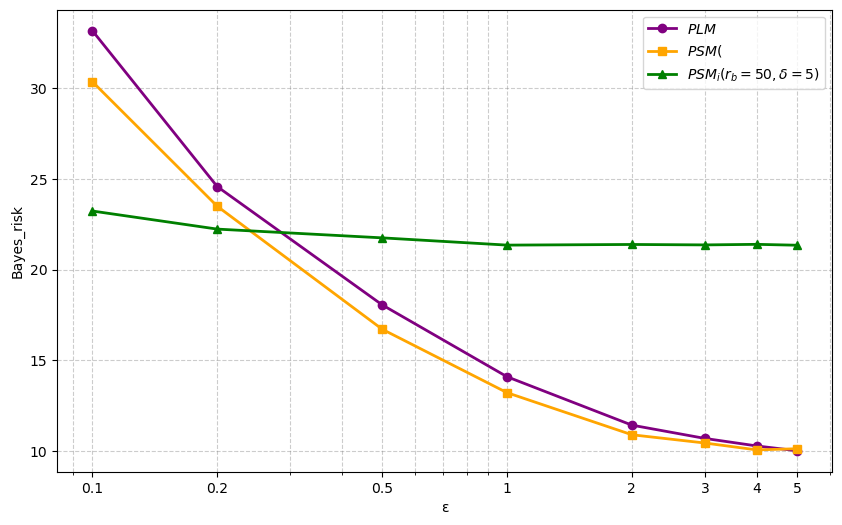

In [29]:
## import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)

epsilon_values=[0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
# Define lines
line1 = {'x': epsilon_values, 'y': b_l, 'label': '$PLM$', 'color': 'purple', 'marker': 'o', 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': b_s, 'label': '$PSM$(', 'color': 'orange', 'marker': 's', 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': b_o, 'label': r'$PSM_i$($r_b=50, \delta=5$)', 'color': 'green', 'marker': '^', 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': x_values_O_b200_d10, 'label': r'$PSM_i$($r_b=200, \delta=10$)', 'color': 'red', 'marker': '^', 'linestyle': '-'}

# Increase the figure size for better readability

plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2)
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2)
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2)
#plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2)

# Labels for axes and title
plt.xlabel('ε')
plt.ylabel('Bayes_risk')
#plt.title('Geolife (Per Point)')

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])

# Adding legend
plt.legend()

# Show grid
plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)



# Saving the plot as a high-definition PNG
#pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/Approx_bsm_ln_1200'
#plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# Saving the plot as an SVG
#pathsvg = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/Approx_bsm_ln_1200'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show

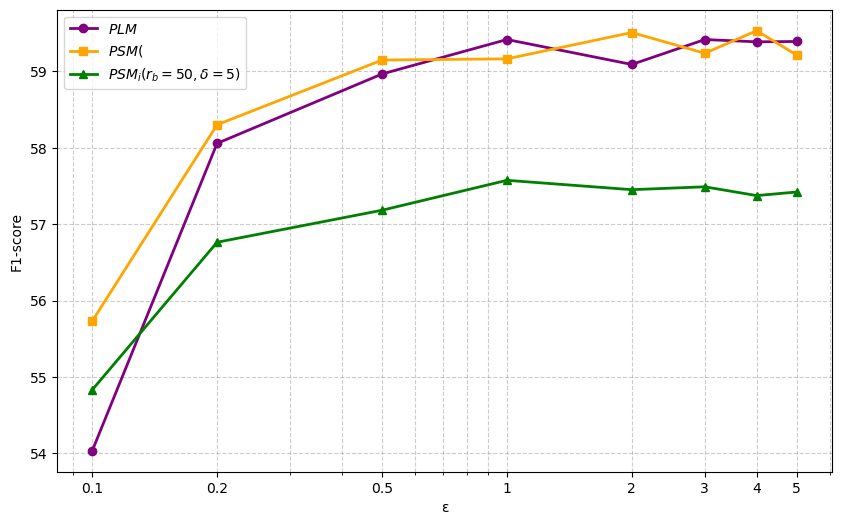

In [30]:
## import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)

epsilon_values=[0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
# Define lines
line1 = {'x': epsilon_values, 'y': f1_l, 'label': '$PLM$', 'color': 'purple', 'marker': 'o', 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': f1_s, 'label': '$PSM$(', 'color': 'orange', 'marker': 's', 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': f1_o, 'label': r'$PSM_i$($r_b=50, \delta=5$)', 'color': 'green', 'marker': '^', 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': x_values_O_b200_d10, 'label': r'$PSM_i$($r_b=200, \delta=10$)', 'color': 'red', 'marker': '^', 'linestyle': '-'}

# Increase the figure size for better readability

plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2)
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2)
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2)
#plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2)

# Labels for axes and title
plt.xlabel('ε')
plt.ylabel('F1-score')
#plt.title('Geolife (Per Point)')

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])

# Adding legend
plt.legend()

# Show grid
plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)



# Saving the plot as a high-definition PNG
#pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/Approx_bsm_ln_1200'
#plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# Saving the plot as an SVG
#pathsvg = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/Approx_bsm_ln_1200'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

In [234]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def process_directory(file_directory, use_alternate_columns=False, k_values=range(1, 11)):
    all_files = os.listdir(file_directory)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    csv_files.sort()

    # Initialize dictionaries to store cumulative scores for each k
    cumulative_scores = {k: {'f1': 0, 'precision': 0, 'recall': 0, 'bayes_risk': 0, 'count': 0} for k in k_values}

    for file_name in csv_files:
        file_path = os.path.join(file_directory, file_name)
        data = pd.read_csv(file_path)

        if use_alternate_columns:
            observations = data[['reported_lat', 'reported_lon']]
        else:
            observations = data[['Perturbed_Latitude', 'Perturbed_Longitude']]
        
        secrets = data['location_id']
        X_train, X_test, y_train, y_test = train_test_split(observations, secrets, test_size=0.20, random_state=0)

        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
            knn.fit(X_train, y_train)
            predicted_locations = knn.predict(X_test)

            f1 = f1_score(y_test, predicted_locations, average='macro', zero_division=0)
            precision = precision_score(y_test, predicted_locations, average='macro', zero_division=0)
            recall = recall_score(y_test, predicted_locations, average='macro', zero_division=0)
            bayes_risk = (1 - accuracy_score(y_test, predicted_locations))

            cumulative_scores[k]['f1'] += f1
            cumulative_scores[k]['precision'] += precision
            cumulative_scores[k]['recall'] += recall
            cumulative_scores[k]['bayes_risk'] += bayes_risk
            cumulative_scores[k]['count'] += 1

    # Calculate averages for each k
    average_scores = {}
    for k in cumulative_scores:
        count = cumulative_scores[k]['count']
        if count > 0:
            average_scores[k] = {metric: cumulative_scores[k][metric] / count for metric in ['f1', 'precision', 'recall', 'bayes_risk']}

    return average_scores

# Example usage
file_directory = '/path/to/directory'
averages = process_directory(file_directory)
for k in averages:
    print(f"k={k}: {averages[k]}")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/directory'

In [121]:
def process_directory(file_directory, use_alternate_columns=False):
    # Get a list of all files in the directory
    all_files = os.listdir(file_directory)

    # Filter out CSV files
    csv_files = [file for file in all_files if file.endswith('.csv')]
    csv_files.sort()
    for file_name in csv_files:
        file_path = os.path.join(file_directory, file_name)
        data = pd.read_csv(file_path)

        # Choose the columns based on the condition
        if use_alternate_columns:
            observations = data[['reported_lat', 'reported_lon']]
        else:
            observations = data[['Perturbed_Latitude', 'Perturbed_Longitude']]
        
        secrets = data['location_id']

        # Create a mapping from secret ID to average coordinates
        mid_coords = data[['location_id', 'mid_latitude', 'mid_longitude']].drop_duplicates().set_index('location_id')
    
    
        # Create a mapping from secret ID to average coordinates
        avg_coords = data[['location_id', 'avg_latitude', 'avg_longitude']].drop_duplicates().set_index('location_id')

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(observations, secrets, test_size=0.2, random_state=0)
    
        # Train the model
    
    
        # 8.448700194970938
        #3.6692238739308056
        
        
        knn = KNeighborsClassifier(
            n_neighbors=3,    # Number of neighbors
            n_jobs=-1          # Number of parallel jobs (-1 means using all processors)
        )

        knn.fit(X_train, y_train)
    
    
        # Make predictions
        predicted_locations = knn.predict(X_test)
    
    # Calculate accuracy, precision, and recall
        f1 = f1_score(y_test, predicted_locations, average='macro', zero_division=0)

        #accuracy = accuracy_score(y_test, predicted_locations)
        precision = precision_score(y_test, predicted_locations, average='macro', zero_division=0)
        recall = recall_score(y_test, predicted_locations, average='macro', zero_division=0) # 'macro' or 'weighted' based on your data
        # Calculate accuracy
        #accuracy = accuracy_score(y_test, predicted_locations)

        # Calculate Haversine distance between mid lat and lon with perturbed lat and perturbed lon
#         distances_mid = []
#         for i, pred_loc_id in enumerate(predicted_locations):
#             mid_lat, mid_lon = mid_coords.loc[pred_loc_id]
#             perturbed_lat, perturbed_lon = X_test.iloc[i]
#             dist = calculate_haversine(mid_lat, mid_lon, perturbed_lat, perturbed_lon)
#             distances_mid.append(dist)

#         average_distance_mid = sum(distances_mid) / len(distances_mid)
    
#         # Calculate Haversine distance average lat and lon with perturbed lat and perturbed lon
        
#         distances_avg = []
#         for i, pred_loc_id in enumerate(predicted_locations):
#             avg_lat, avg_lon = avg_coords.loc[pred_loc_id]
#             perturbed_lat, perturbed_lon = X_test.iloc[i]
#             dist = calculate_haversine(avg_lat, avg_lon, perturbed_lat, perturbed_lon)
#             distances_avg.append(dist)

#         average_distance_avg = sum(distances_avg) / len(distances_avg)
#         # ... (rest of your code) ...

        # Inside your loop where you process each file:
        print("#########################################")
        print(f"File: {file_name}")
       # print(f"Attack Accuracy: {accuracy * 100:.2f}%")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1 Score: {f1 * 100:.2f}%")
        #print(f"Average Haversine Distance(Me): {average_distance_avg:.2f} meters")
        #print(f"Average Haversine Distance(Professor): {average_distance_mid:.2f} meters")
        print("#########################################")



In [134]:

#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Laplace/encoded/5km/1000_1000'
process_directory(directory_to_process, use_alternate_columns=False)

#########################################
File: merged_averaged_laplace_0.1_5km_encoded.csv
Precision: 42.00%
Recall: 45.02%
F1 Score: 41.97%
#########################################
#########################################
File: merged_averaged_laplace_0.2_5km_encoded.csv
Precision: 52.01%
Recall: 56.01%
F1 Score: 52.87%
#########################################
#########################################
File: merged_averaged_laplace_0.5_5km_encoded.csv
Precision: 58.97%
Recall: 63.31%
F1 Score: 60.15%
#########################################
#########################################
File: merged_averaged_laplace_1_5km_encoded.csv
Precision: 56.80%
Recall: 60.37%
F1 Score: 57.88%
#########################################
#########################################
File: merged_averaged_laplace_2_5km_encoded.csv
Precision: 57.61%
Recall: 61.49%
F1 Score: 58.76%
#########################################
#########################################
File: merged_averaged_laplace_3_5km_encode

In [135]:

#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Staircase/encoded/5km/1000_1000'
process_directory(directory_to_process, use_alternate_columns=False)

#########################################
File: merged_averaged_staircase_0.1_5km_encoded.csv
Precision: 54.35%
Recall: 57.01%
F1 Score: 54.43%
#########################################
#########################################
File: merged_averaged_staircase_0.2_5km_encoded.csv
Precision: 57.96%
Recall: 61.02%
F1 Score: 58.70%
#########################################
#########################################
File: merged_averaged_staircase_0.5_5km_encoded.csv
Precision: 58.54%
Recall: 61.75%
F1 Score: 59.37%
#########################################
#########################################
File: merged_averaged_staircase_1_5km_encoded.csv
Precision: 61.93%
Recall: 66.53%
F1 Score: 63.37%
#########################################
#########################################
File: merged_averaged_staircase_2_5km_encoded.csv
Precision: 60.83%
Recall: 64.88%
F1 Score: 61.87%
#########################################
#########################################
File: merged_averaged_staircase_

In [136]:

#Our_bl_50_delta_5
# Now you can call the function directly with the directory and the condition
directory_to_process = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Machine_Learning_Averaged/Our_bl_50_delta_5/encoded/5km/1000_1000'
process_directory(directory_to_process, use_alternate_columns=True)

#########################################
File: merged_our_0.1_5km_encoded.csv
Precision: 55.27%
Recall: 58.47%
F1 Score: 56.08%
#########################################
#########################################
File: merged_our_0.2_5km_encoded.csv
Precision: 57.89%
Recall: 61.56%
F1 Score: 58.70%
#########################################
#########################################
File: merged_our_0.5_5km_encoded.csv
Precision: 57.64%
Recall: 60.82%
F1 Score: 58.50%
#########################################
#########################################
File: merged_our_1_5km_encoded.csv
Precision: 55.75%
Recall: 58.95%
F1 Score: 56.33%
#########################################
#########################################
File: merged_our_2_5km_encoded.csv
Precision: 53.86%
Recall: 57.74%
F1 Score: 55.05%
#########################################
#########################################
File: merged_our_3_5km_encoded.csv
Precision: 58.15%
Recall: 61.38%
F1 Score: 58.91%
######################